In [1]:
import warnings; warnings.simplefilter('ignore')
import P4_toolbox        as p4

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

# to show and store figures in the notebook
%matplotlib inline

# to load datasets
transactions_normalized = pd.read_csv('./dataset/transactions_normalized.csv')
transactions_original = pd.read_csv('./dataset/transactions_original.csv')
products = pd.read_csv('./dataset/products_preprocessed.csv')
customers = pd.read_csv('./dataset/customers_preprocessed.csv')

# pandas settings
pd.set_option('display.max_row', 110)
pd.set_option('display.max_column', 110)

# Relation sexe / catégorie

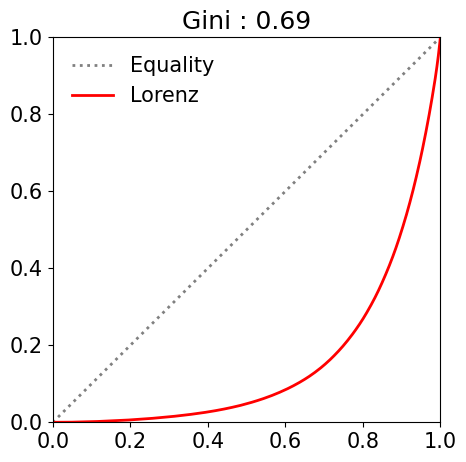

In [2]:
t = transactions_original[['id_prod', 'is_male', 'categ']] \
    .groupby(['id_prod', 'categ']).sum().sort_values(by='is_male').reset_index()

table = p4.lorenz_gini_graph_dataframe('is_male', t)

### Pareto : Les produits vendus les plus féminins (80% de femmes, 20% d'hommes)

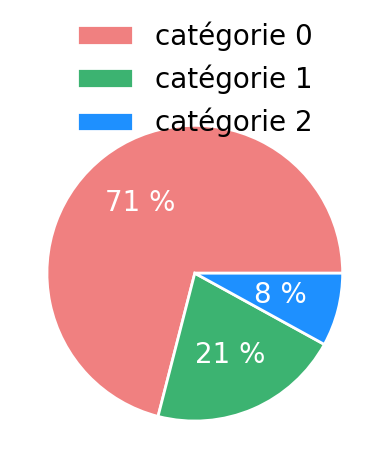

In [3]:
women = table[table['cum_weights'] <= 0.20]
p4.pie_chart(women, t, ['lightcoral', 'mediumseagreen', 'dodgerblue'])

### Pareto : les produits vendus les plus masculins (20% de femmes, 80% d'hommes)

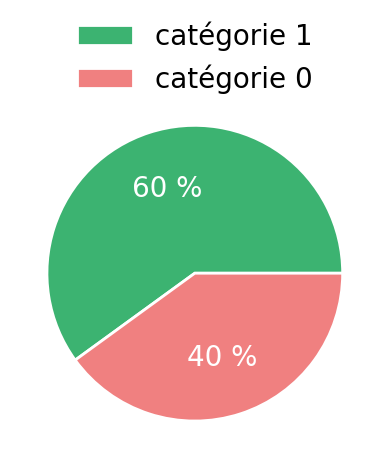

In [4]:
men = table[table['cum_weights'] >= 0.80]
p4.pie_chart(men, t, ['mediumseagreen', 'lightcoral'])

### Tests statistiques

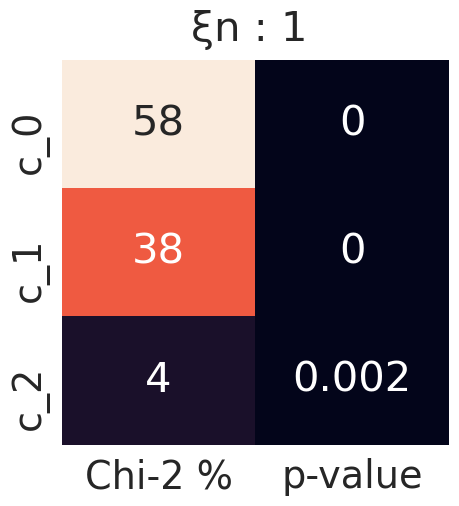

In [5]:
p = pd.read_csv('./dataset/transactions_normalized.csv', usecols=['is_male', 'categ'])

p['is_male'] = p['is_male'].astype('int')
p4.chi2('is_male','categ', p)

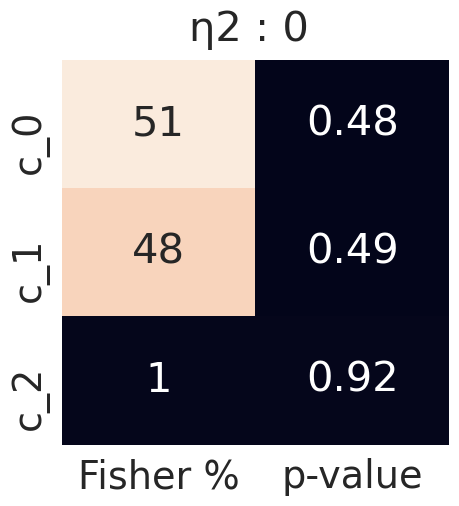

In [6]:
p4.eta2('is_male','categ', p)

# Relation age / montant total

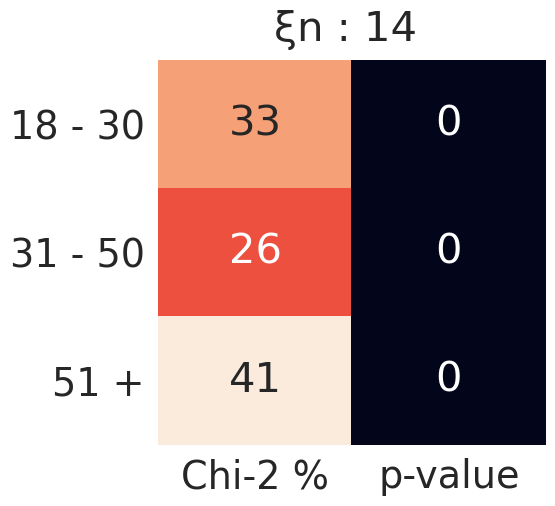

In [7]:
p4.chi2('total_buy', 'age_segment', customers)

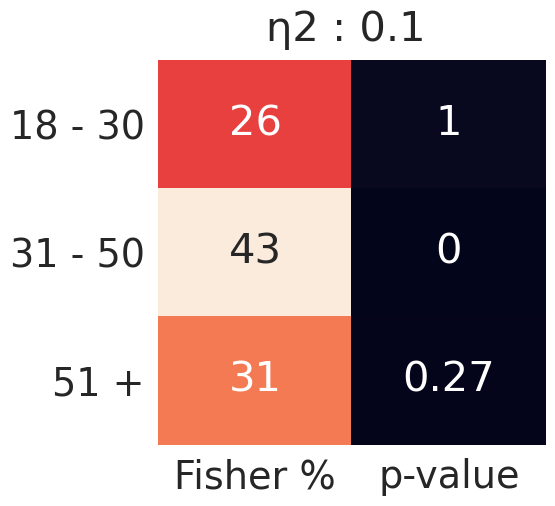

In [8]:
p4.eta2('total_buy', 'age_segment', customers)

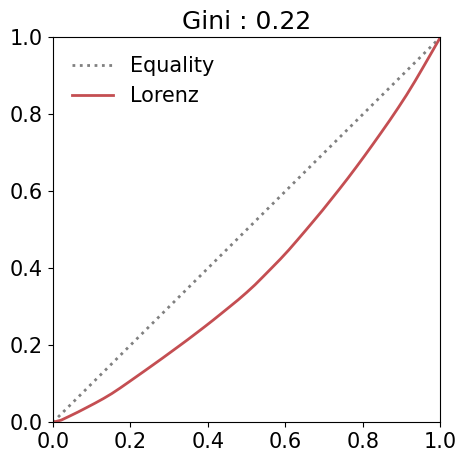

In [9]:
t = customers[['age','total_buy']].groupby(['age']).sum().sort_values(by='total_buy').reset_index()
table = p4.lorenz_gini_graph_dataframe('total_buy', t)

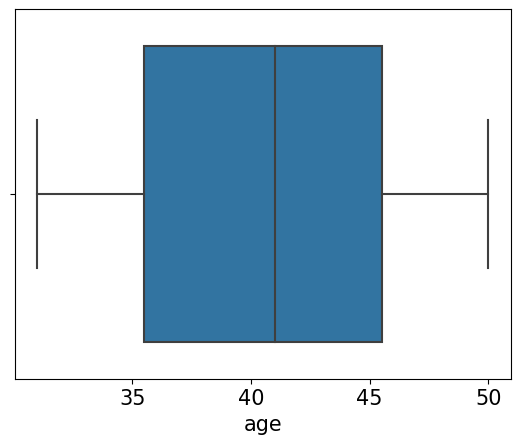

In [10]:
table = table.merge(t['age'], left_index=True, right_index=True)
table = table[table['cum_frequences']>=0.6]
sns.boxplot(table['age']);

In [11]:
p4.frequence_weight_ratios(table, 50)

0.39
0.55


# Relation age / montant total

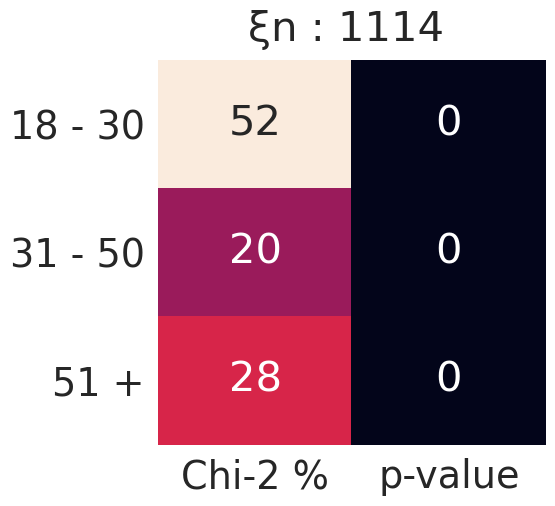

In [12]:
p4.chi2('month_buy_rate', 'age_segment', customers)

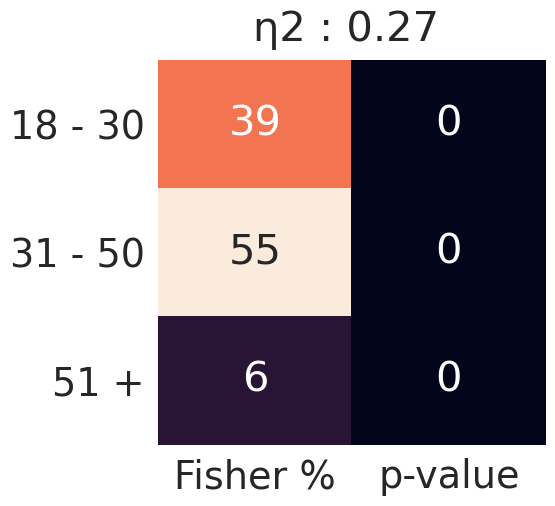

In [13]:
p4.eta2('month_buy_rate', 'age_segment', customers)

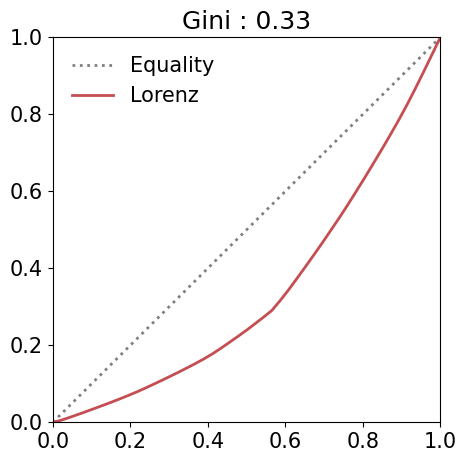

In [14]:
t = customers[['age','month_buy_rate']].groupby(['age']).sum().sort_values(by='month_buy_rate').reset_index()
table = p4.lorenz_gini_graph_dataframe('month_buy_rate', t)

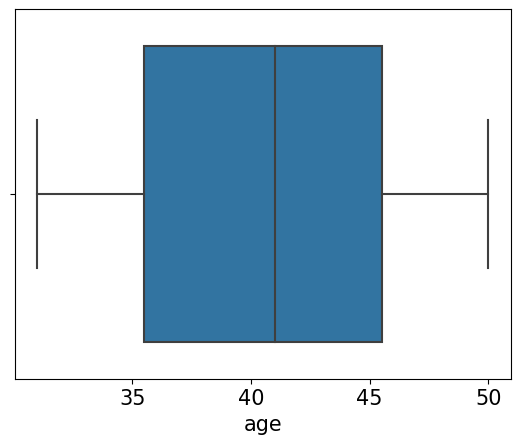

In [15]:
table = table.merge(t['age'], left_index=True, right_index=True)
table = table[table['cum_frequences']>=0.6]
sns.boxplot(table['age']);

In [16]:
p4.frequence_weight_ratios(table, 50)

0.39
0.66


# Relation age / taille du panier moyen

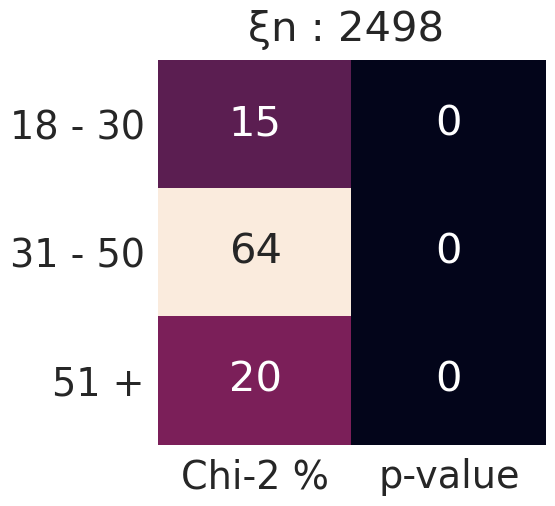

In [17]:
p4.chi2('average_basket_size', 'age_segment', customers)

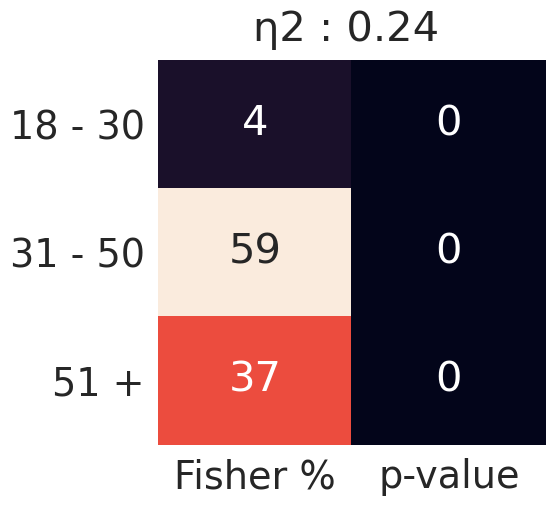

In [18]:
p4.eta2('average_basket_size', 'age_segment', customers)

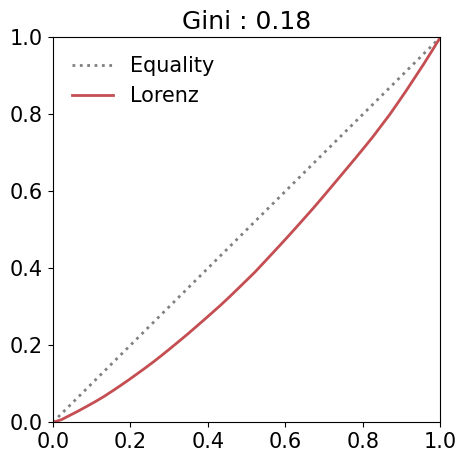

In [19]:
t = customers[['age','average_basket_size']].groupby(['age']).sum()\
.sort_values(by='average_basket_size').reset_index()
table = p4.lorenz_gini_graph_dataframe('average_basket_size', t)

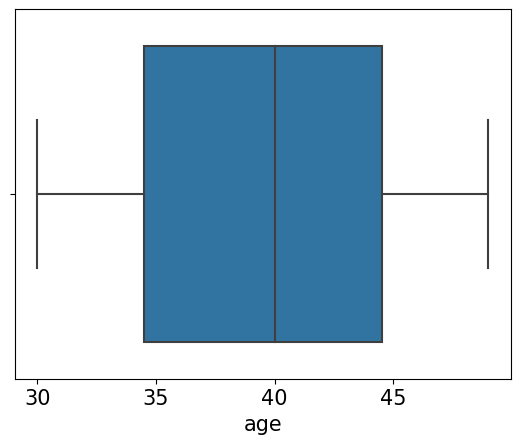

In [20]:
table = table.merge(t['age'], left_index=True, right_index=True)
table = table[table['cum_frequences']>=0.6]
sns.boxplot(table['age']);

In [21]:
p4.frequence_weight_ratios(table, 31)

0.39
0.52


# Relation age / categorie 0

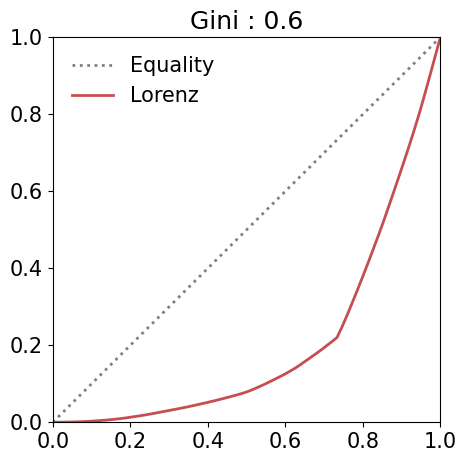

In [22]:
tr = transactions_original[['age', 'categ']].copy()
tr = p4.one_hot_matrix('categ', tr).groupby('age').sum().reset_index()

table = p4.lorenz_gini_graph_dataframe('c_0', tr)
c_0_age_sorted = tr[['age', 'c_0']].sort_values(by='c_0').reset_index(drop=True)
table = table.merge(c_0_age_sorted['age'], left_index=True, right_index=True)

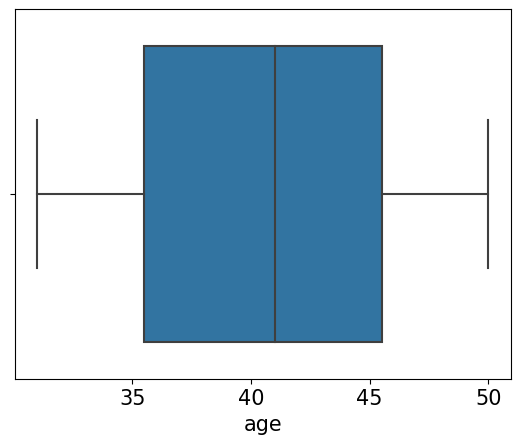

In [23]:
sns.boxplot(table[table['cum_frequences'] >= 0.75]['age']);

In [24]:
p4.frequence_weight_ratios(table, 37)

0.25
0.75


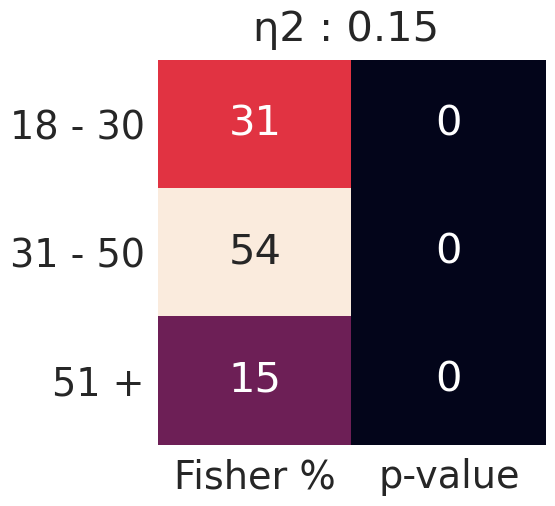

In [25]:
t = pd.read_csv('./dataset/transactions_normalized.csv')
t = p4.one_hot_matrix('categ', t)
c = pd.read_csv('./dataset/customers_preprocessed.csv', usecols=['age_segment', 'id_customer'])
t = t.merge(c, left_on='id_customer', right_on='id_customer')

p4.eta2('c_0','age_segment', t)

# Relation age / categorie 1

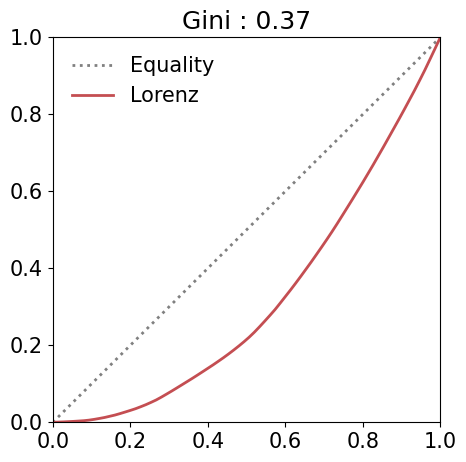

In [26]:
tr = transactions_original[['age', 'categ']].copy()
tr = p4.one_hot_matrix('categ', tr).groupby('age').sum().reset_index()

table = p4.lorenz_gini_graph_dataframe('c_1', tr)
c_1_age_sorted = tr[['age', 'c_1']].sort_values(by='c_1').reset_index(drop=True)
table = table.merge(c_1_age_sorted['age'], left_index=True, right_index=True)

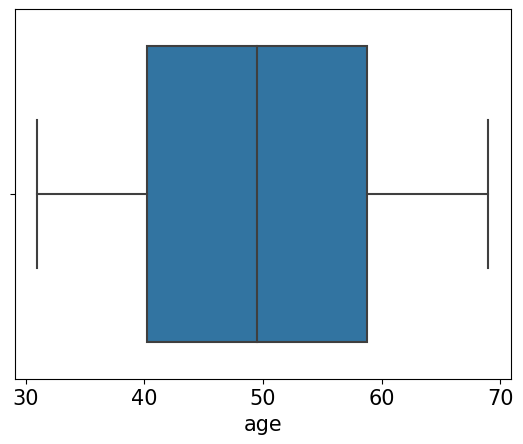

In [27]:
sns.boxplot(table[table['cum_frequences'] >= 0.50]['age']);

In [28]:
p4.frequence_weight_ratios(table, 30)

0.51
0.79


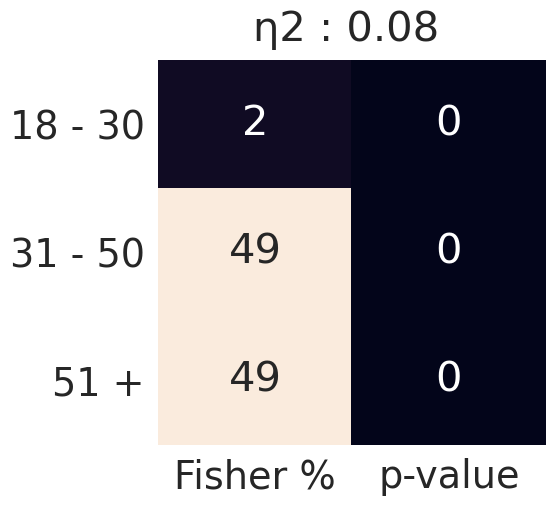

In [29]:
p4.eta2('c_1','age_segment', t )

# Relation age / categorie 2

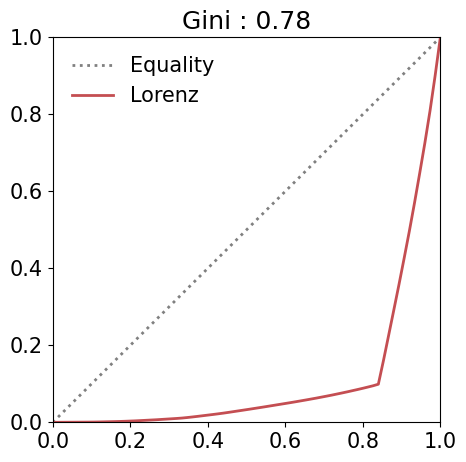

In [30]:
tr = transactions_original[['age', 'categ']].copy()
tr = p4.one_hot_matrix('categ', tr).groupby('age').sum().reset_index()

table = p4.lorenz_gini_graph_dataframe('c_2', tr)
c_1_age_sorted = tr[['age', 'c_2']].sort_values(by='c_2').reset_index(drop=True)
table = table.merge(c_1_age_sorted['age'], left_index=True, right_index=True)

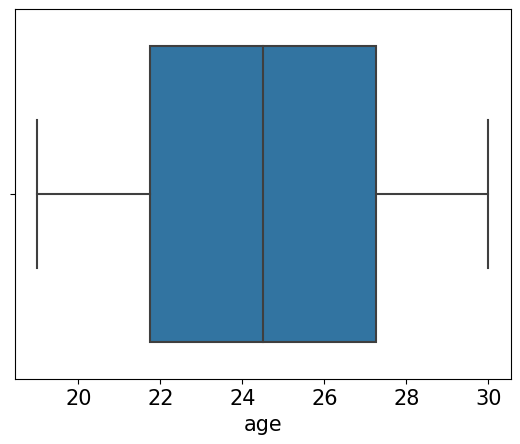

In [31]:
sns.boxplot(table[table['cum_frequences'] >= 0.85]['age']);

In [32]:
p4.frequence_weight_ratios(table, 22)

0.15
0.84


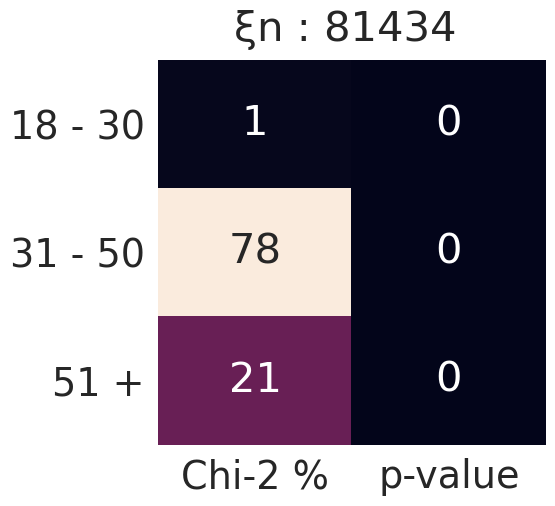

In [33]:
t['c_2'] = t['c_2'].astype('int')
p4.chi2('c_2','age_segment', t)